In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

medical_df = pd.read_csv("C:/Users/court/OneDrive/Desktop/WGU/D212/medical_market_basket.csv")

pd.set_option('display.max_columns', None)
medical_df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
medical_df.shape

(15002, 20)

In [3]:
#Removing Empty Rows from df

medical_df.dropna(axis=0, how='all', inplace = True)

medical_df.head()

,Presc01,Presc02,Presc03,Presc04,Presc05,Presc06,Presc07,Presc08,Presc09,Presc10,Presc11,Presc12,Presc13,Presc14,Presc15,Presc16,Presc17,Presc18,Presc19,Presc20
1,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
3,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
medical_df.shape

(7501, 20)

In [5]:
#Create List of Lists

rows = []

for i in range(0, 7501):
    rows.append([str(medical_df.values[i, j])
                 for j in range (0, 20)])

In [6]:
#Feed list to transaction encoder
from mlxtend.preprocessing import TransactionEncoder

DE = TransactionEncoder()

array = DE.fit(rows).transform(rows)

#Return Array to DataFrame
prescriptions = pd.DataFrame(array, columns = DE.columns_)

prescriptions.head()


,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,nan,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [7]:
prescriptions.shape

(7501, 120)

In [8]:
#Display Items as Columns

for col in prescriptions.columns:
    print(col)


Duloxetine
Premarin
Yaz
abilify
acetaminophen
actonel
albuterol HFA
albuterol aerosol
alendronate
allopurinol
alprazolam
amitriptyline
amlodipine
amoxicillin
amphetamine
amphetamine salt combo
amphetamine salt combo xr
atenolol
atorvastatin
azithromycin
benazepril
benicar
boniva
bupropion sr
carisoprodol
carvedilol
cefdinir
celebrex
celecoxib
cephalexin
cialis
ciprofloxacin
citalopram
clavulanate K+
clonazepam
clonidine HCI
clopidogrel
clotrimazole
codeine
crestor
cyclobenzaprine
cymbalta
dextroamphetamine XR
diazepam
diclofenac sodium
doxycycline hyclate
enalapril
escitalopram
esomeprazole
ezetimibe
fenofibrate
fexofenadine
finasteride
flovent hfa 110mcg inhaler
fluconozole
fluoxetine HCI
fluticasone
fluticasone nasal spray
folic acid
furosemide
gabapentin
glimepiride
glipizide
glyburide
hydrochlorothiazide
hydrocodone
hydrocortisone 2.5% cream
ibuprophen
isosorbide mononitrate
lansoprazole
lantus
levofloxacin
levothyroxine sodium
lisinopril
lorazepam
losartan
lovastatin
meloxicam
met

In [9]:
#Identify and Remove Empty Columns

cleaned_Rx = prescriptions.drop(['nan'], axis = 1)

cleaned_Rx.shape



(7501, 119)

In [10]:
#Write transformed Data to CSV
cleaned_Rx.to_csv(r'C:/Users/court/OneDrive/Desktop/WGU/D212/medical_data__PA3_prescriptions_clean.csv')

In [11]:
#Imporing Packages for Market Basket Analysis

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = cleaned_Rx

data.head()

,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [13]:
data.shape

(7501, 119)

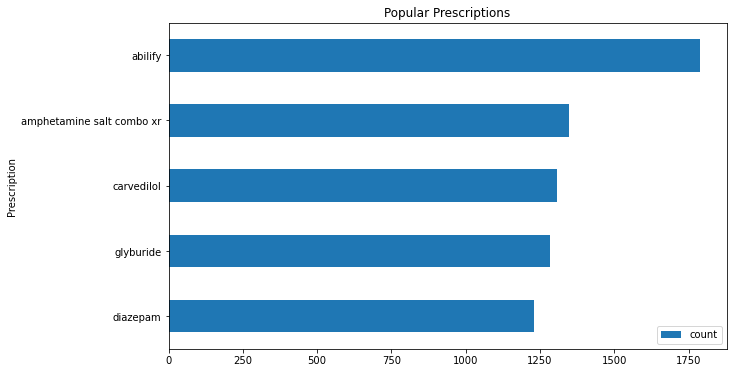

In [14]:
#Most popular Rx

count = data.loc[:,:].sum()
pop_Rx = count.sort_values(0, ascending = False).head(5)
pop_Rx = pop_Rx.to_frame()
pop_Rx = pop_Rx.reset_index()
pop_Rx = pop_Rx.rename(columns = {'index': 'Prescription', 0: 'count'})

plt.rcParams['figure.figsize'] = (10, 6)
ax = pop_Rx.plot.barh(x = 'Prescription', y='count')
plt.title('Popular Prescriptions')
plt.gca().invert_yaxis()

In [15]:
#Creating Apriori Object called frequent_items

frequent_items = apriori(data, min_support = 0.001, use_colnames = True)
frequent_items.head()

,support,itemsets
0,0.011998,(Duloxetine)
1,0.046794,(Premarin)
2,0.004266,(Yaz)
3,0.238368,(abilify)
4,0.015731,(acetaminophen)


In [16]:
#Creating the Rules

rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1.0)

print(len(rules))

40590


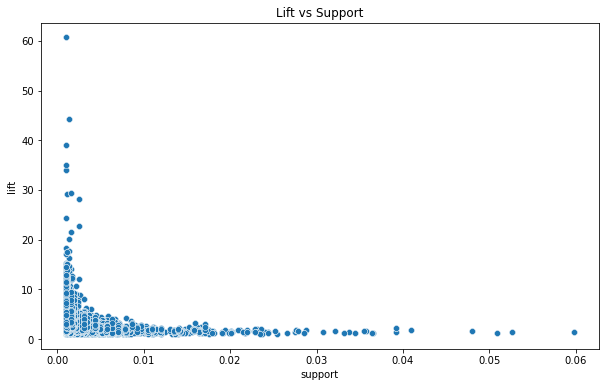

In [17]:
#Scatterplot of Support values
sns.scatterplot(x='support', y='lift', data = rules)
plt.title("Lift vs Support")
plt.show()

In [18]:
#Pruning at 0.05 support

frequent_items = apriori(data, min_support = 0.05, use_colnames = True)
frequent_items.sort_values(['support'], axis = 0, ascending = False).head()

,support,itemsets
0,0.238368,(abilify)
4,0.179709,(amphetamine salt combo xr)
6,0.174110,(carvedilol)
17,0.170911,(glyburide)
11,0.163845,(diazepam)


In [19]:
#Creating Rules
rules = association_rules(frequent_items, metric = 'lift', min_threshold = 1.0)
print(len(rules))

6


In [20]:
#Sorting Rules by Support, Confidence, and Lift

rules.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
2,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
4,(abilify),(diazepam),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
1,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648
0,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562


In [21]:
#Top Three Rules

rules.sort_values(['support', 'confidence', 'lift'], axis = 0, ascending = False).head(3)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(carvedilol),(abilify),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437
2,(abilify),(carvedilol),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606
5,(diazepam),(abilify),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965


In [22]:
#Generating a Heatmap

#Converting antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

print(rules[['antecedents', 'consequents']])

                 antecedents                consequents
0                    abilify  amphetamine salt combo xr
1  amphetamine salt combo xr                    abilify
2                    abilify                 carvedilol
3                 carvedilol                    abilify
4                    abilify                   diazepam
5                   diazepam                    abilify


<AxesSubplot:xlabel='antecedents', ylabel='consequents'>

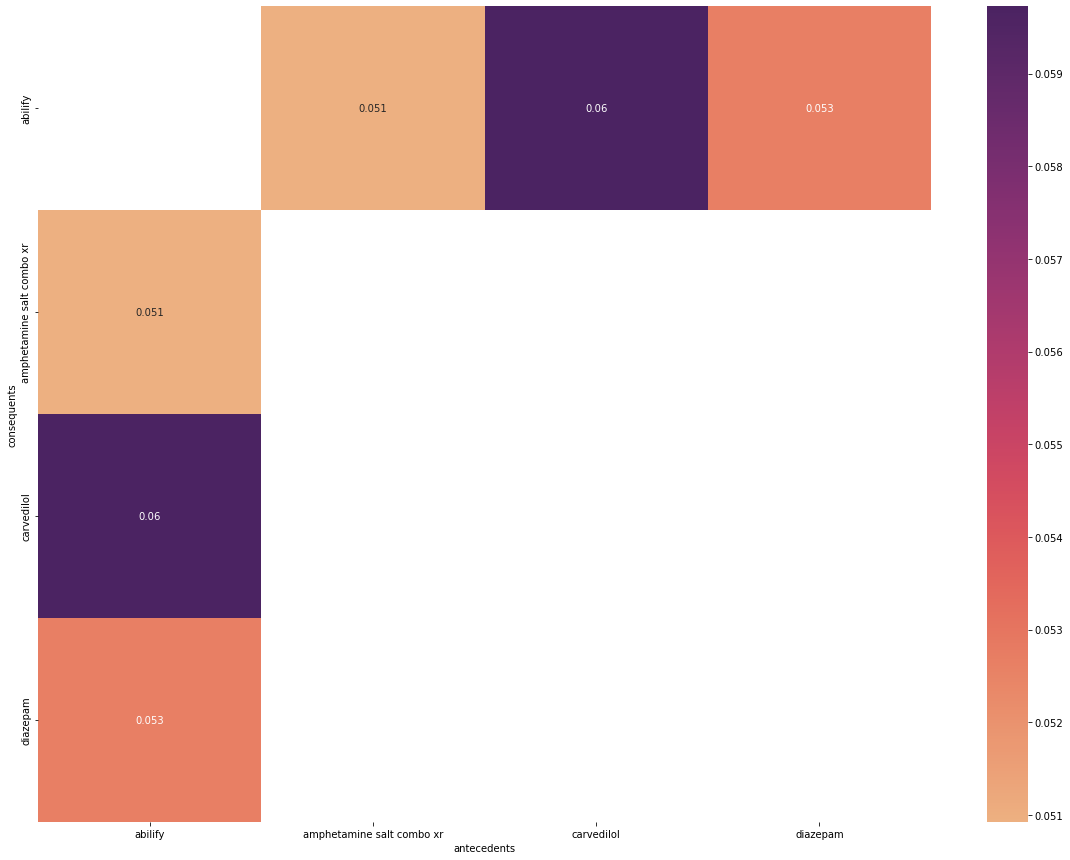

In [23]:
#Transforming antecedent, consequent, and support columns into matrix

support_table = rules.pivot(index = 'consequents', columns = 'antecedents', values = 'support')


fig, ax = plt.subplots(figsize = (20, 15))
sns.heatmap(support_table, annot = True, cmap = 'flare', ax = ax)

<AxesSubplot:>

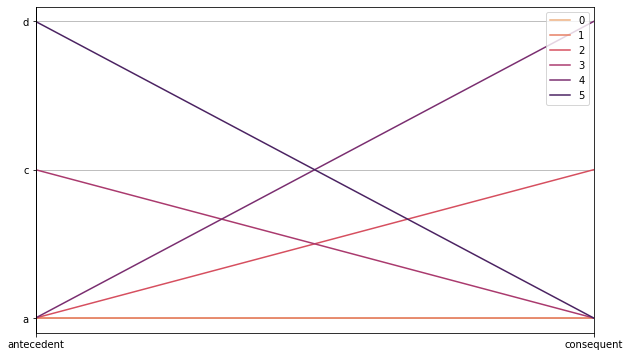

In [24]:
#Parallel Coordinate Plot
from pandas.plotting import parallel_coordinates
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])

rules['rule'] = rules.index

coords = rules[['antecedent', 'consequent', 'rule']]

parallel_coordinates(coords, 'rule', colormap = 'flare')